## Part 2: A Reaction-Diffusion Model# 

In the 2nd part of this tutorial, we'll apply the reation diffusion equation to the modeling of fire spread. The dynamics aspects of the fire forest propogation can be analyzed using the hyperbolic reation diffusion equations.

### The derivation of the model# 

We have the nomenclature of parameters in the model as following table

| Symbols |    Parameters         |
|------   |  ------               |
|   $D$   | Diffusion coefficient |
|   $N$   | The density of the burnt trees |
|   $\tau$   | Relaxation time in the presence of the fire flux |
|   $F$   | Reaction term between green and burning trees |
|   $r$   | Reaction constant |
|   $\Delta t$   | Time increment of time discretization |
|   $\Delta x$   | Distance increment of spatial discretization |
|   $i, j$   | Grid indice |

If we want to study the spatial-temporal evolution of $N$, we can adopt the hyperbolic reaction-diffusion equation as following

\begin{align}
\tau \frac{\partial^2 N}{\partial t^2} + \frac{\partial N}{\partial t} & = D \frac{\partial^2 N}{\partial x^2} + F(N) + \tau \frac{\partial F(N)}{\partial t} \\
\end{align}

\begin{align}
\frac{\partial N}{\partial t} & = D \frac{\partial^2 N}{\partial x^2} + F(N)\\
\end{align}

Notably, the reaction function can be expressed as following,
\begin{align}
F(N) & = r (1-N)^\beta N
\end{align}
where $\beta (>1)$ denotes the number of burning trees needed in order to set fire to a near green tree and we have the density of green trees as $1-N$.

Applying the finite element method to solve the above PDE, we need to discretize the spatial grids and time increment first and have the following iterative relation,

\begin{align}
N_{i,j} ^{n+1} & = N_{i,j} ^{n} + \frac{D \Delta t}{\Delta x^2} (N_{i+1,j} ^{n} + N_{i,j+1} ^{n} - 4 N_{i,j} ^{n} + N_{i-1,j} ^{n} + N_{i,j-1} ^{n}) + r \Delta t (1-N_{i,j} ^{n})^\beta N_{i,j} ^{n}\\
\end{align}



Following these states, we create a 100 by 100 grid with randomly picked state for each cell. The global status of the grid can be updated using FEM by each time step.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
def EDM(r, beta, D, dt, dx, N, M, Soln0):
    
    Soln=np.zeros((N, M, M))
    Soln[0,:,:]=Soln0
    Coeff=D*dt/dx**2

    if(Coeff>=0.5): print("Hard to converge")
    for n in range(1,N-1):
        temp=(Soln[n-1,0:-2,1:-1]+Soln[n-1,1:-1,0:-2]-4*Soln[n-1,1:-1,1:-1]+Soln[n-1,1:-1,2:]+Soln[n-1,2:,1:-1])        
        Soln[n,1:-1,1:-1]+=(Coeff*temp+dt*r*(1-Soln[n-1,1:-1,1:-1])**beta*Soln[n-1,1:-1,1:-1])
            
    return Soln

In [24]:
import numpy as np

r=10
beta=10
D=100
dt=0.001
dx=1
N=100 #time disc
M=100 #space disc

Init=np.random.normal(0, 0.1, (M,M))
for i in range(M):
    for j in range(M):
        if (Init[i,j]<-0.1): Init[i,j]=1
        else: Init[i,j]=0
Soln=EDM(r, beta, D, dt, dx, N, M, Init)

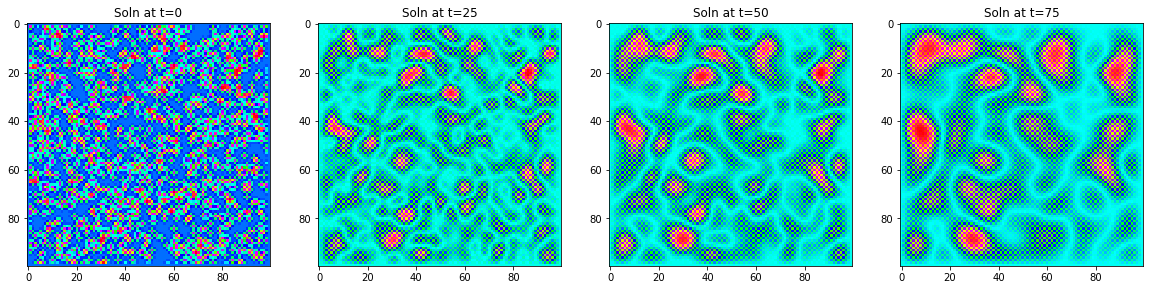

In [25]:
import matplotlib.pyplot as plt
# lets plot at some intervals

plt.subplot(1,4,1)
plt.imshow(Soln[2,:,:],cmap="hsv",interpolation="none")
plt.title("Soln at t=0")
plt.subplot(1,4,2)
plt.imshow(Soln[24,:,:],cmap="hsv",interpolation="none")
plt.title("Soln at t=25")
plt.subplot(1,4,3)
plt.imshow(Soln[49,:,:],cmap="hsv",interpolation="none")
plt.title("Soln at t=50")
plt.subplot(1,4,4)
plt.imshow(Soln[98,:,:],cmap="hsv",interpolation="none")
plt.title("Soln at t=75")
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()
